# UEDS

In [2]:
import os, sys, numpy as np
path = os.getcwd()+"/../../.."
sys.path.append(path)    #give here the path to the folder containing the package,default does not work!!

In [3]:
tmp_figure_out = os.getcwd()+"/out_put"

In [4]:
import Ensembler
from Ensembler.src.potentials import OneD as pot
from Ensembler import visualisation as vis

from matplotlib import pyplot as plt
%matplotlib inline

## Build System

### Potential

In [5]:
end_states = [pot.harmonicOsc(x_shift=1, fc=12000), pot.harmonicOsc(x_shift=1.5, fc=12000)]
eds_potential = pot.envelopedPotential(V_is=end_states, s=1)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


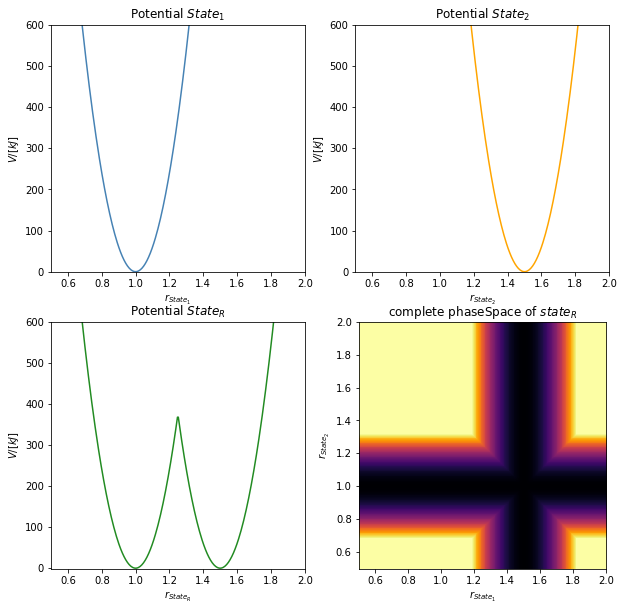

In [6]:
#Visualisation
positions = np.linspace(0.5,2,300)
fig, ax = vis.plotPotentials.plot_envelopedPotential_2State_System(eds_potential=eds_potential, positions=positions, s_value=0.5)
fig.savefig(tmp_figure_out+"/general_eds_pot.png")

### Integrator

In [7]:
integrator = Ensembler.integrator.metropolisMonteCarloIntegrator(maxStepSize=0.1)

### System

In [8]:
system = Ensembler.system.system(potential=eds_potential, integrator=integrator)

## Simulation

In [9]:
#set Starting Position
system.set_position([[2.3],[2.3]])
system.getCurrentState()

State(position=array([[2.3],
       [2.3]]), temperature=298.0, totEnergy=3839.999999999998, totPotEnergy=3839.999999999998, totKinEnergy=nan, dhdpos=nan, velocity=nan)

In [10]:
#simulate
system.simulate(steps=2000, withdrawTraj=True)

Progress: 	0%	10%	20%	30%	40%	50%	60%	70%	80%	90%	100%


State(position=array([[1.47967624],
       [1.47967624]]), temperature=298.0, totEnergy=2.478330280078863, totPotEnergy=2.478330280078863, totKinEnergy=nan, dhdpos=-0.1, velocity=None)

## Analysis

In [11]:
#del traj
traj = system.getTrajectory()
traj.columns, traj.shape

(Index(['position', 'temperature', 'totEnergy', 'totPotEnergy', 'totKinEnergy',
        'dhdpos', 'velocity'],
       dtype='object'), (2000, 7))

In [12]:
from matplotlib import pyplot as plt
%matplotlib inline

def plotting_1D2State_eds_pot_simulation(system, x_range=None, y_range=None):
    traj = system.getTrajectory()
    eds_potential = system.potential
    
    y_range = [0,2.5]
    x_range= [0,2.5]
    positions = np.linspace(0,2.5,300)
    positions1 = list(map(lambda x: x[0],traj.position))
    positions2 = list(map(lambda x: x[1],traj.position))
    enes1 = eds_potential.V_is[0].ene(np.array(list(map(lambda x: x[0], traj.position))).flat)
    enes2 = eds_potential.V_is[1].ene(np.array(list(map(lambda x: x[1], traj.position))).flat)
    enesR = eds_potential.ene(list(map(lambda x: x, traj.position)))
    fig, ax = vis.plotPotentials.plot_envelopedPotential_2State_System(eds_potential=eds_potential, positions=positions, s_value=0.5)
    
    ax[0].scatter(positions1, enes1)
    ax[0].scatter(positions1[-1], enes1[-1], color="r")
    ax[0].scatter(positions1[0], enes1[0], color="g")

    ax[1].scatter(positions2, enes2)
    ax[1].scatter(positions2[-1], enes2[-1], color="r")
    ax[1].scatter(positions2[0], enes2[0], color="g")

    ax[2].scatter(positions1, enesR)
    ax[2].scatter(positions1[-1], enesR[-1], color="r")
    ax[2].scatter(positions1[0],  enesR[0], color="g")
    
    ax[-1].scatter(positions2, positions1, alpha=0.4)
    ax[-1].scatter(positions2[-1], positions1[-1], color="r")
    ax[-1].scatter(positions2[0], positions1[0], color="g")

    for x in ax:
        x.set_xlim(x_range)
        
    ax[-1].set_ylim(y_range)
    
    fig.show()
    return fig

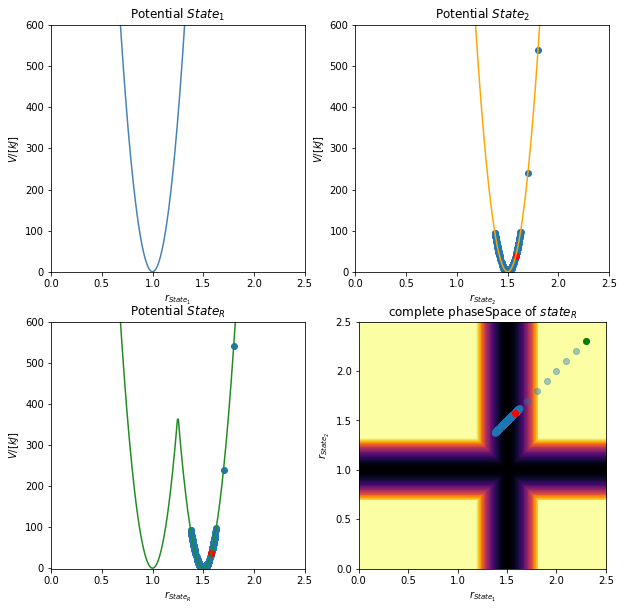

In [15]:
fig = plotting_1D2State_eds_pot_simulation(system)
fig.savefig(tmp_figure_out+"/coupled_simluation_eds_pot.png")

In [14]:
print(tmp_figure_out+"/coupled_simluation_eds_pot.png")

C:\Users\benja\OneDrive - ETHZ\PhD\Code\Ensembler\examples\in_progress/out_put/general_eds_pot.png


In [13]:
traj

,position,temperature,totEnergy,totPotEnergy,totKinEnergy,dhdpos,velocity
0,"[[2.3], [2.3]]",298.0,3.840000e+03,3.840000e+03,NaN,NaN,"[0.9214066466881922, -0.12230802844520526]"
1,"[[2.1999999999999997], [2.1999999999999997]]",298.0,2.940000e+03,2.940000e+03,NaN,-0.100000,None
2,"[[2.0999999999999996], [2.0999999999999996]]",298.0,2.160000e+03,2.160000e+03,NaN,-0.100000,None
3,"[[1.9999999999999996], [1.9999999999999996]]",298.0,1.500000e+03,1.500000e+03,NaN,-0.100000,None
4,"[[1.8999999999999995], [1.8999999999999995]]",298.0,9.600000e+02,9.600000e+02,NaN,-0.100000,None
5,"[[1.7999999999999994], [1.7999999999999994]]",298.0,5.400000e+02,5.400000e+02,NaN,-0.100000,None
6,"[[1.6999999999999993], [1.6999999999999993]]",298.0,2.400000e+02,2.400000e+02,NaN,-0.100000,None
7,"[[1.6457809630561266], [1.6457809630561266]]",298.0,1.275125e+02,1.275125e+02,NaN,-0.054219,None
8,"[[1.5457809630561266], [1.5457809630561266]]",298.0,1.257538e+01,1.257538e+01,NaN,-0.100000,None
9,"[[1.4457809630561265], [1.4457809630561265]]",298.0,1.763822e+01,1.763822e+01,NaN,-0.100000,None
